<a href="https://colab.research.google.com/github/rubozero/mcd-2023-programming/blob/main/marginalizacion_municipios_mex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice de marginalización de México

El Consejo Nacional de Población (CONAPO) del gobierno mexicano, realiza cada 5 años un análisis sobre un estudio multidimensional de la pobreza y establece un índice de marginación.

Para este ejercicio se utiliza la Base de datos por municipio 2020



In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Se carga la **Base de datos por municipio 2020** seleccionando la pestaña de **IMM_2020** y se utiliza como índice la columna de clave de entedidad **(CVE_MUN)**, que es la primer columna.

In [88]:
imm_url = 'http://www.conapo.gob.mx/work/models/CONAPO/Marginacion/Datos_Abiertos/Municipio/IMM_2020.xls'
data_frame = pd.read_excel(imm_url, sheet_name=None)

df_imm = data_frame.get('IMM_2020')
# df_imm = df_imm.set_index(df_imm.columns[0])
df_imm.head(5)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042


Se utiliza la pestaña 'Diccionario' del DataFrame para tener una variable diccionario con las claves y sus nombres, que se utilizan en las columnas de la pestaña IMM_2020.
<br/>
Se crea un nuevo DataFrame con los nombres de las columnas obtenidos de Diccionario.

In [74]:
# Procesar la pestaña Diccionario
df_dict = data_frame.get('Diccionario').iloc[2:]
dict_col_names = {}

for index, row in df_dict.iterrows():
    key = row.iloc[0]
    value = row.iloc[1]
    dict_col_names[key] = value

df_imm_nombres = df_imm.rename(columns=dict_col_names)

Se muestra diferente información relacionada al Data Frame

In [75]:
print("Información del DataFrame IMM_2020\n")

cantidad_variables = len(df_imm_nombres.columns)
print("Número de variables: {}".format(cantidad_variables))

valores_perdidos = df_imm_nombres.columns[df_imm_nombres.isnull().any()].tolist()
print("Valores perdidos: {}".format(valores_perdidos if len(valores_perdidos) > 0 else 0))

variables_numericas = df_imm.select_dtypes(include=['int', 'float']).columns.tolist()
print("Variables cuantitativas (Código): {}".format(variables_numericas if len(variables_numericas) > 0 else 0))

variables_numericas = df_imm_nombres.select_dtypes(include=['int', 'float']).columns.tolist()
print("Variables cuantitativas (Nombre): {}".format(variables_numericas if len(variables_numericas) > 0 else 0))

variables_cualitativas = df_imm_nombres.select_dtypes(include=['object']).columns.tolist()
print("Variables cualitativas (Código): {}".format(variables_cualitativas if len(variables_cualitativas) > 0 else 0))

variables_cualitativas = df_imm.select_dtypes(include=['object']).columns.tolist()
print("Variables cualitativas (Nombre): {}".format(variables_cualitativas if len(variables_cualitativas) > 0 else 0))

Información del DataFrame IME_2020

Número de variables: 17
Valores perdidos: 0
Variables cuantitativas (Código): ['CVE_ENT', 'CVE_MUN', 'POB_TOT', 'ANALF', 'SBASC', 'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM', 'IM_2020', 'IMN_2020']
Variables cuantitativas (Nombre): ['Clave de entidad federativa', 'Clave del municipio', 'Población total', 'Porcentaje de población analfabeta de 15 años o más', 'Porcentaje de población de 15 años o más sin educación básica', 'Porcentaje de ocupantes en viviendas particulares habitadas sin drenaje ni excusado', 'Porcentaje de ocupantes en viviendas particulares habitadas sin energía eléctrica', 'Porcentaje de ocupantes en viviendas particulares habitadas sin agua entubada', 'Porcentaje de ocupantes en viviendas particulares habitadas con piso de tierra', 'Porcentaje de viviendas particulares con hacinamiento', 'Porcentaje de población que vive en localidades menores a 5 000 habitantes', 'Porcentaje de población ocupada con ingresos de h

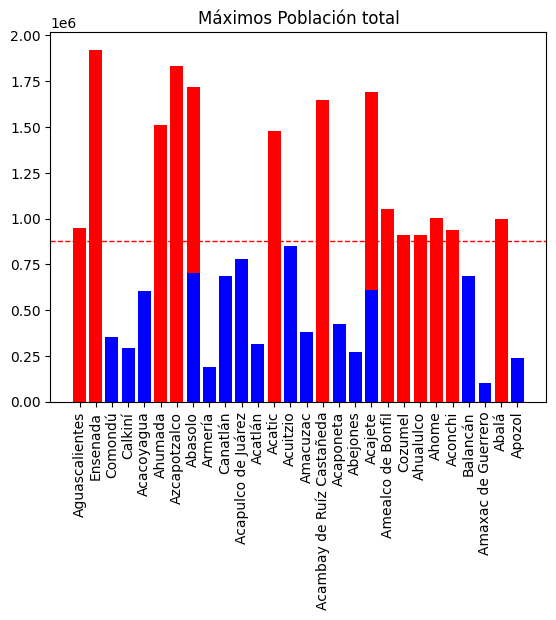

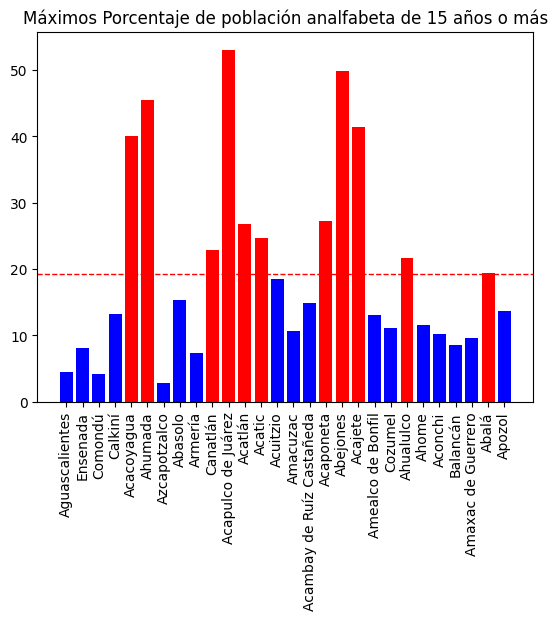

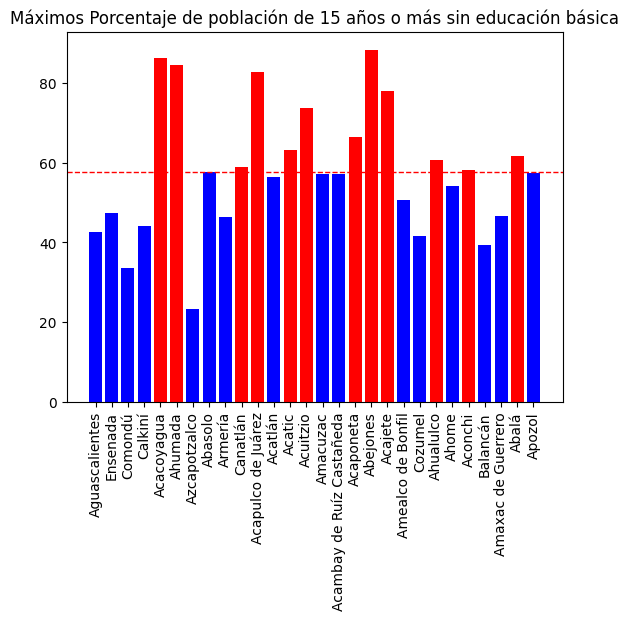

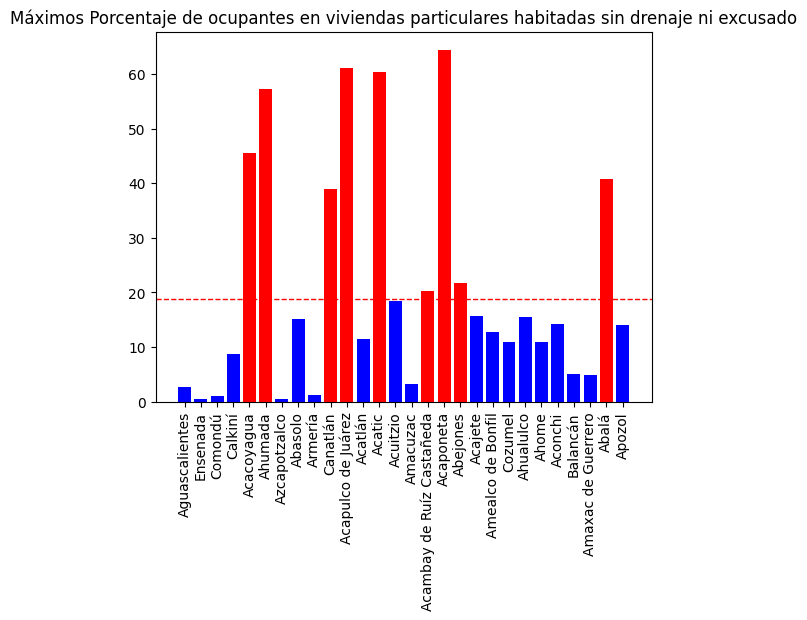

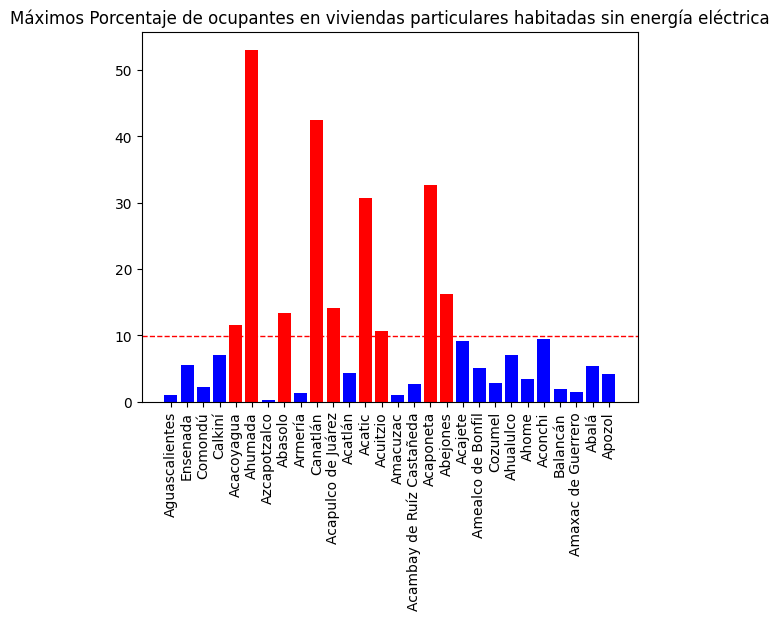

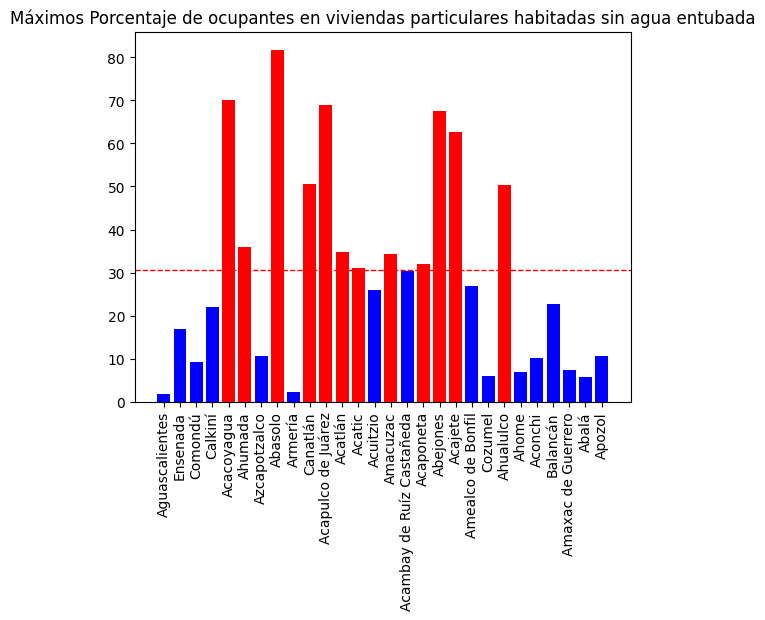

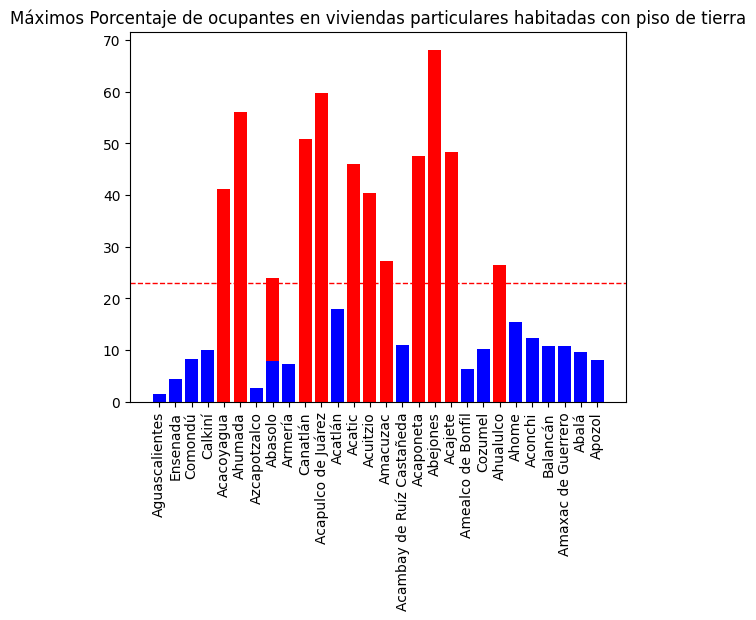

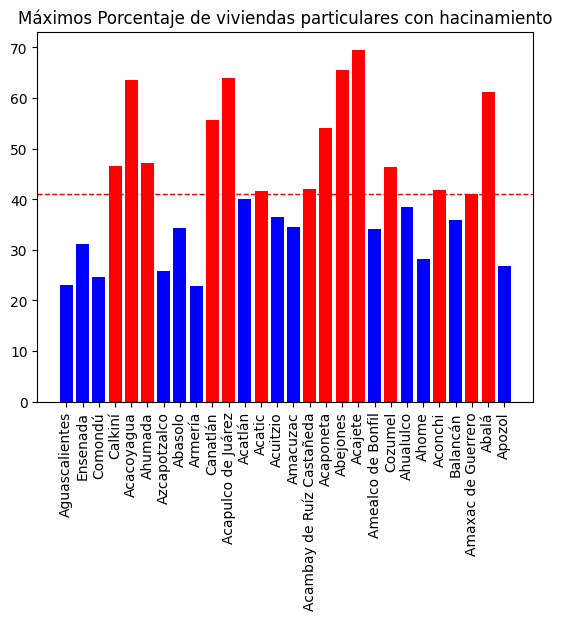

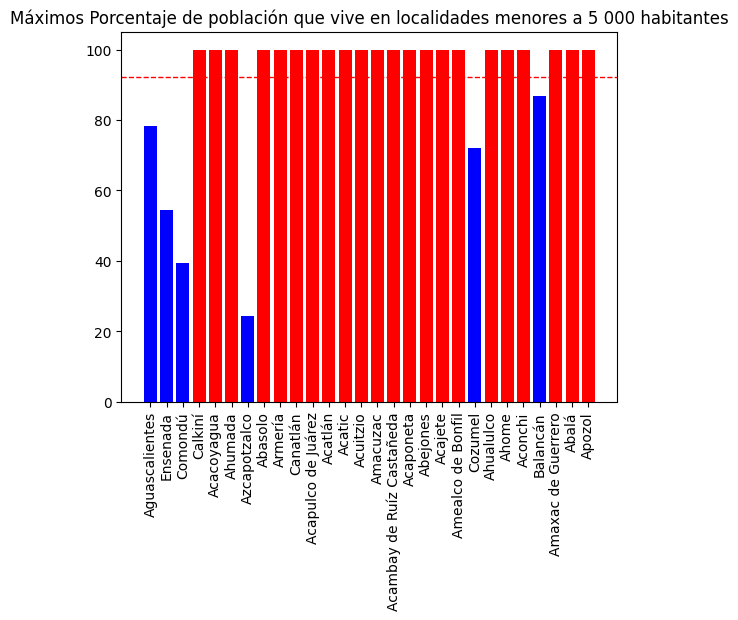

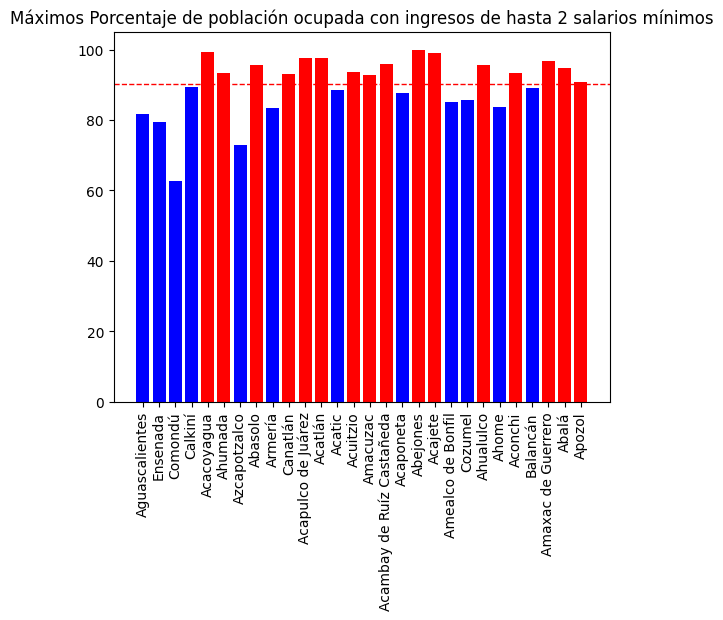

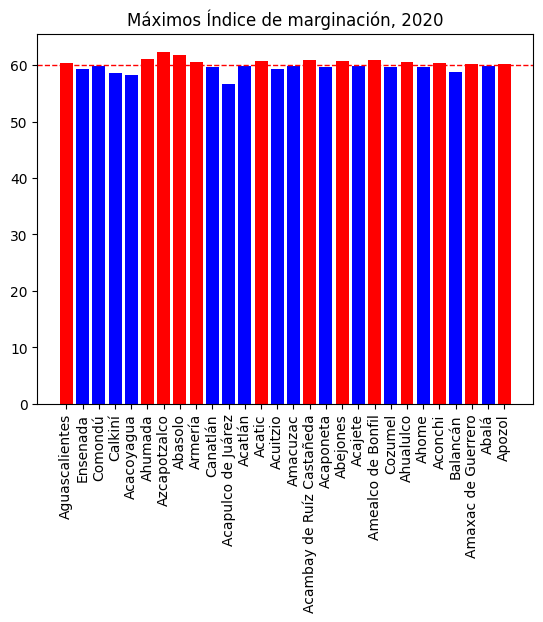

In [260]:
#No pude solucionar un bug para que 'NOM_MUN' corresponda con el máximo
def describe_df_max(col_name):
  aggregations = {col_name: 'max', 'NOM_MUN': 'first'}
  grouped_df = df_imm.groupby(['NOM_ENT']).agg(aggregations)
  # grouped_df = grouped_df.rename(columns={col_name : dict_col_names[col_name], 'NOM_MUN' : dict_col_names['NOM_MUN']})
  dibujar(grouped_df, col_name, "Máximos ")

def dibujar(df, col_name, tipo):
    columna = df[col_name]
    barras = plt.bar(df['NOM_MUN'], columna, color=['r' if d > columna.mean() else 'b' for d in columna])
    plt.xticks(rotation = 90)
    plt.title(tipo + dict_col_names[col_name])
    plt.axhline(y=np.nanmean(columna), color='red', linestyle='--', linewidth=1, label='Avg')
    plt.show()

columnas = df_imm.columns[4:15]
for col_name in columnas:
  describe_df_max(col_name)


In [76]:
def cuenta_gm_2020(valor):
  return np.where(df_imm['GM_2020']==valor,1,0)

Text(0.5, 1.0, '% de municipios por estado con índices de marginación')

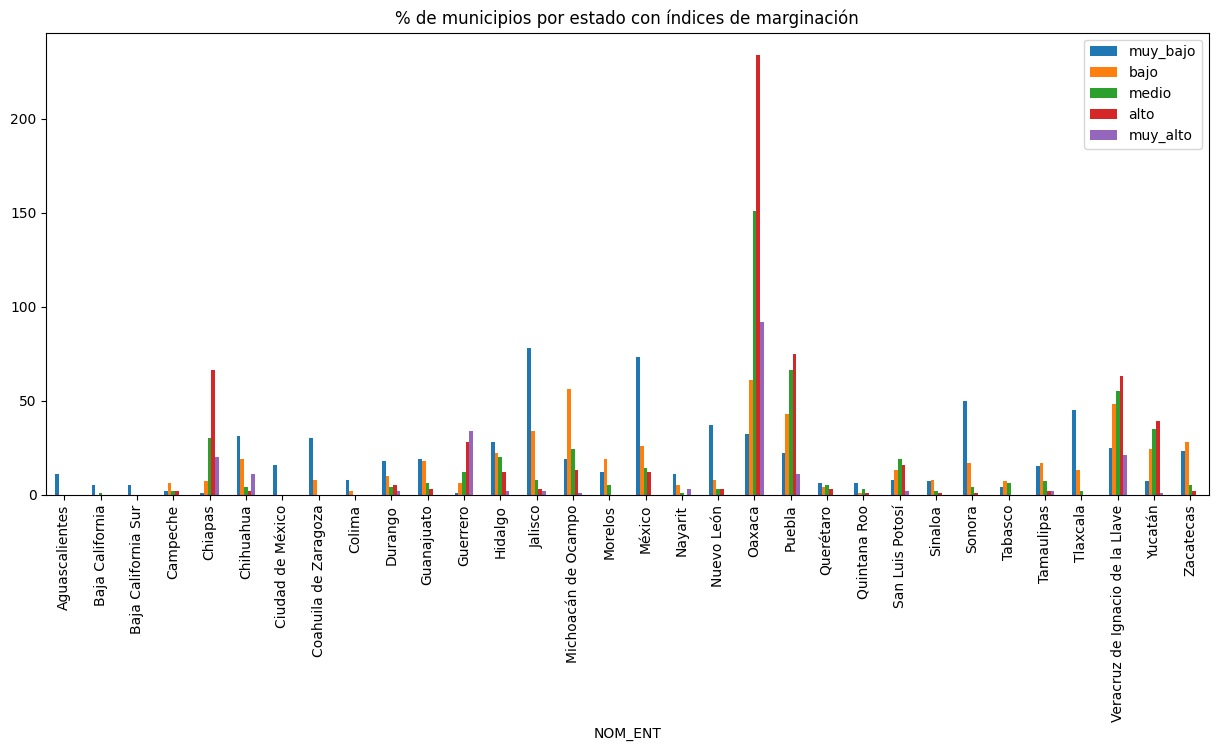

In [261]:
# No pude agregar el total para poder sacar porcentaje
def sum_occurrences(row):
    target_row = df_imm.loc[df_imm['CVE_ENT'] == df_imm['CVE_ENT']]
    return row['occurrences'].sum() + target_row['occurrences'].sum()

df_filtrado = df_imm.assign(
 muy_bajo = cuenta_gm_2020('Muy bajo'),
 bajo = cuenta_gm_2020('Bajo'),
 medio = cuenta_gm_2020('Medio'),
 alto = cuenta_gm_2020('Alto'),
 muy_alto = cuenta_gm_2020('Muy alto'),
  ).groupby(['NOM_ENT']).agg({'NOM_ENT':lambda x: x.iloc[0], 'muy_bajo': sum, 'bajo':sum, 'medio':sum, 'alto':sum, 'muy_alto':sum})


df_filtrado.plot(x="NOM_ENT", y=["muy_bajo", "bajo", "medio", "alto", "muy_alto"], kind="bar", figsize=(15, 6))
plt.title('% de municipios por estado con índices de marginación')
plt.savefig('marginacion_estado_municipio.png', dpi=300)